### <span style="color:#A28C15; font-size:2.5em;"> 📊 Bank Marketing Campaign Analysis and Prediction </span>


# 📊 **Term Deposit Subscription - Client Behavior Analysis Project**

## 📝 **Project Overview**
In the world of modern banking, where customers have access to endless financial products, understanding client behavior is crucial. This dataset encapsulates the story of a bank’s direct marketing campaign, where personalized outreach to clients aims to promote term deposits. The challenge lies in identifying which clients are most likely to subscribe.

### ***What is a Term Deposit?***

A Term deposit is a deposit that a bank or a financial institurion offers with a fixed rate (often better than just opening deposit account) in which your money will be returned back at a specific maturity time

## ***Background and Context:***
This dataset contains data collected from direct marketing campaigns of a Portuguese bank. These campaigns aim to promote term deposits by contacting clients through phone calls.
## ***Problem Statement:***
The key problem is to predict whether ***a client will subscribe to a term deposit*** based on their profile and campaign details, enabling the bank to optimize its campaign resources and target potential customers effectively.

## Goal of the Project
## **Main Objective:** 
Develop a machine learning model to predict client subscription based on demographic, financial, and campaign-related featus.reIdentify key factors influencing deposit subscription decisions.

## **Evaluation Metrics:**
- Accuracy
- Precision
- Recall
- F1-score
- ROC

.
***Dataset Size***: 45,211 rows, 17 features (16 features + 1 Target L

.
***Outcome***: Build models to identify key client segments and improve campaign efficiency.

## 📈 **Dataset Description**

This is the classic marketing bank dataset uploaded originally in the UCI Machine Learning Repository. The dataset gives you information about a marketing campaign of a financial institution in which you will have to analyze in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.

The dataset comprises ***45,211 rows and 17 columns*** of client information, campaign details, and the final outco of whether they subscribed to a term deposit (y)me.Each row in the dataset tells the story of a client interaction. Whether it's the duration of a call, the timing of the campaign, or the client’s financial profile, every feature offers a clue about what works and what doesn’t in engaging clients.
- **Client Demographics**
- **Financial Profile**
- **Campaign Details**
- **Target Variabl*
- T
This allows for a comprehensive analysis of factors influencing subscription decisio.

--------------------------------------------------------------------------.


<h2 style="color: Blue; font-family: Arial; font-weight: bold;">Importing necessary libraries and the dataset</h2>



In [474]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [475]:

# Load the dataset with ';' as the delimiter
bank_df = pd.read_csv('bank-full.csv', delimiter=';')


| No. | Attribute     |   Data type     |   Description                                    |  Demographic   |                          
|:---:|:--------------|:----------------|:------------------------------------------------|:----------------|
|  1  | age           | Numeric/Integer |                                                 |Age  |
|  2  | job           | Categorical     | type of job (categorical: 'admin.','blue collar','entrepreneur','housemaid','management', 'retired','self-employed','services','student','technician','unemployed','unknown')     | Occupation   |        
|  3  |marital        | Categorical	    | marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)    |Marital Status  |
|  4  |education      | Categorical	    |(categorical:'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')	  | Education Level  |
|  5  |default        | Binary		    | has credit in default?                          |    |
|  6  | balance       | Integer		    | average yearly balance                          |    |
|  7  | housing       |Binary		    | has housing loan?                               |    |
|  8  | loan          | Binary		    | has personal loan?                              |    |
|  9  | contact       | Categorical		| contact communication type(categorical: 'cellular','telephone')   |    |
| 10  | day_of_week   | Date		    | last contact day of the week                    |    |
| 11  | month         | Date		    | last contact month of year(categorical:'jan','feb','mar', ...,'nov','dec') |    |
| 12  | duration       |Integer	|	last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  |    |
| 13  | campaign	        | Integer|		number of contacts performed during this campaign and for this client (numeric, includes last contact)|    |
| 14  | pdays	        | Integer	|	number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)|    |
| 15  |previous	        | Integer	|	number of contacts performed before this campaign and for this client|    |
| 16  | poutcome	        |Categorical|		outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')|    |
| 17  |Label - y (term_deposit) | object |	 has the client subscribed a term deposit? (binary: 'yes','no')?|    |


# <font color="#4863A0" size="5"> Initial Information About The Dataset 🧪</font>
This comment signifies that we are going to display initial information of the dataset to get a glimpse of the data's structure and values.
- Displaying the first few rows of the dataset to get a glimpse of the data.
- Checking the shape of the dataset (number of rows and columns).
- Exploring the column names and data types.
- Descriptive Statistics includes:
    - Numeric Variables.
    - Categorical Variables.

In [478]:
# Display the first few rows to confirm the structure
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [479]:
# Display the last few rows to confirm the structure
bank_df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


## ***Insights Explanation***

🧩 **The Dataset**

Key Features Include:

👤 **Client Demographics**: Age, job type, marital status, education level.

💳 **Financial Profile**: Account balance, housing loan, personal loan.

📅 **Campaign Details**: Contact type, day and month of contact, duration of calls.

📈 **Historical Data**: Outcome of previous campaigns and contact frequency.

🎯 **Target Variable (y)**: Whether the client subscribed to a term deposit.

The dataset provides insights into how client demographics and past campaign interactions influence subscription decisions.

**Features such as age, job, balance, and duration are critical for understanding client behavior.**

In [481]:
# Show the shape of the dataset
print("The shape =", bank_df.shape)

# Dataset dimensions and statistics
num_rows, num_cols = bank_df.shape
num_features = num_cols - 1

# Print the information about the dataset
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_cols}")
print(f"Number of Features: {num_features}")
categorical_features=[feature for feature in bank_df.columns if ((bank_df[feature].dtypes=='O') & (feature not in ['y']))]
print(f"Categorical Features: {categorical_features}")

The shape = (45211, 17)
Number of Rows: 45211
Number of Columns: 17
Number of Features: 16
Categorical Features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


## Insights from Dataset Overview:

- **Total Entries**: 45,211
- **Total Columns**: 17
- **Data Types**: 
  - Integer (7 columns)
  - Object (9 columns + 1 target column)
- Numerical columns: age, balance, day, duration, campaign, pdays, previous

- Categorical columns: job, marital, education, default, housing, loan, contact, month, poutcome, y

In [483]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [484]:

# Logical renaming of columns
bank_df.rename(columns={
    'age': 'customer_age',
    'job': 'job_type',
    'marital': 'marital_status',
    'education': 'education_level',
    'default': 'has_default_credit',
    'balance': 'account_balance',
    'housing': 'has_housing_loan',
    'loan': 'has_personal_loan',
    'contact': 'contact_type',
    'day': 'last_contact_day',
    'month': 'last_contact_month',
    'duration': 'contact_duration',
    'campaign': 'num_contacts_during_campaign',
    'pdays': 'days_since_prev_campaign',
    'previous': 'num_contacts_before_campaign',
    'poutcome': 'prev_campaign_outcome',
    'y': 'term_deposit_subscription'  # Target variable
}, inplace=True)

# Check updated column names
print("Updated Column Names:", bank_df.columns)


Updated Column Names: Index(['customer_age', 'job_type', 'marital_status', 'education_level',
       'has_default_credit', 'account_balance', 'has_housing_loan',
       'has_personal_loan', 'contact_type', 'last_contact_day',
       'last_contact_month', 'contact_duration',
       'num_contacts_during_campaign', 'days_since_prev_campaign',
       'num_contacts_before_campaign', 'prev_campaign_outcome',
       'term_deposit_subscription'],
      dtype='object')


In [485]:
# Display the first few rows to confirm the structure
bank_df.head()

,customer_age,job_type,marital_status,education_level,has_default_credit,account_balance,has_housing_loan,has_personal_loan,contact_type,last_contact_day,last_contact_month,contact_duration,num_contacts_during_campaign,days_since_prev_campaign,num_contacts_before_campaign,prev_campaign_outcome,term_deposit_subscription
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [486]:
for col in bank_df.select_dtypes(include='object').columns:
    print(col)
    print(bank_df[col].unique())

job_type
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital_status
['married' 'single' 'divorced']
education_level
['tertiary' 'secondary' 'unknown' 'primary']
has_default_credit
['no' 'yes']
has_housing_loan
['yes' 'no']
has_personal_loan
['no' 'yes']
contact_type
['unknown' 'cellular' 'telephone']
last_contact_month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
prev_campaign_outcome
['unknown' 'failure' 'other' 'success']
term_deposit_subscription
['no' 'yes']


In [487]:
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
account_balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
last_contact_day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
contact_duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
num_contacts_during_campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
days_since_prev_campaign,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
num_contacts_before_campaign,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0



## ***Key Observations from Summary Statistics:***

The average **age** of clients is around 41 years, with the youngest being 18 and the oldest 95.

Many **days_since_prev_campaign** values are -1, suggesting clients who were not previously contacted.

**contact_duration** has a minimum of 0, possibly indicating calls that were not answered.

In [489]:
bank_df.describe(include=object).T

,count,unique,top,freq
job_type,45211,12,blue-collar,9732
marital_status,45211,3,married,27214
education_level,45211,4,secondary,23202
has_default_credit,45211,2,no,44396
has_housing_loan,45211,2,yes,25130
has_personal_loan,45211,2,no,37967
contact_type,45211,3,cellular,29285
last_contact_month,45211,12,may,13766
prev_campaign_outcome,45211,4,unknown,36959
term_deposit_subscription,45211,2,no,39922


In [490]:
# Check for missing values
bank_df.isnull().sum()

customer_age                    0
job_type                        0
marital_status                  0
education_level                 0
has_default_credit              0
account_balance                 0
has_housing_loan                0
has_personal_loan               0
contact_type                    0
last_contact_day                0
last_contact_month              0
contact_duration                0
num_contacts_during_campaign    0
days_since_prev_campaign        0
num_contacts_before_campaign    0
prev_campaign_outcome           0
term_deposit_subscription       0
dtype: int64

### Explanation:
This step ensures there are no missing values in the dataset. If any exist, appropriate imputation strategies will be applied.

In [492]:
# Check for duplicates
print(f"Number of duplicate rows: {bank_df.duplicated().sum()}")

Number of duplicate rows: 0


<h2 style="color: Red; font-family: Arial; font-weight: bold;text-align:left">Target Feature Engineering</h2>

In [494]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
bank_df['term_deposit_subscription']=le.fit_transform(bank_df['term_deposit_subscription'])
bank_df

,customer_age,job_type,marital_status,education_level,has_default_credit,account_balance,has_housing_loan,has_personal_loan,contact_type,last_contact_day,last_contact_month,contact_duration,num_contacts_during_campaign,days_since_prev_campaign,num_contacts_before_campaign,prev_campaign_outcome,term_deposit_subscription
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


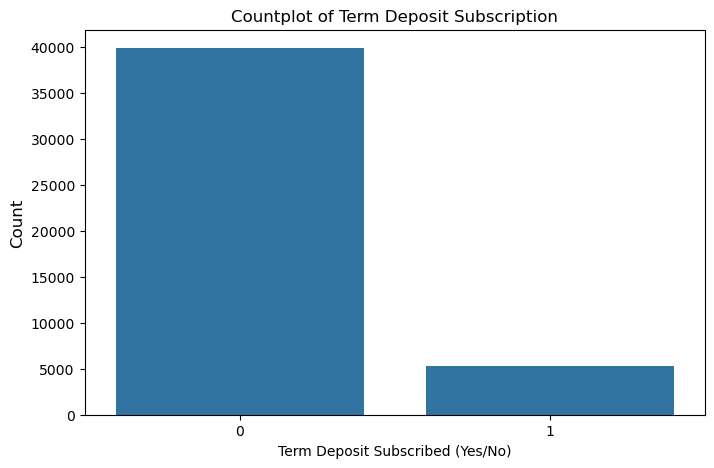

In [495]:
# Plot a countplot for the 'term deposit subscription' column
plt.figure(figsize=(8, 5))
sns.countplot(data=bank_df, x='term_deposit_subscription')
# Add title and labels
plt.title('Countplot of Term Deposit Subscription')
plt.xlabel('Term Deposit Subscribed (Yes/No)')
plt.ylabel('Count', fontsize=12)

# Display the plot
plt.show()

## Imbalance data

Imbalanced data occurs when one class in your dataset significantly outnumbers the other. This can pose challenges for machine learning models, as they might be biased towards the majority class.

In [497]:
bank_df['term_deposit_subscription'].value_counts()

term_deposit_subscription
0    39922
1     5289
Name: count, dtype: int64

Term Deposit Subscription

Not Subscribed :39922

Subscribed :5289

**Term_deposit_subscription is imbalanced**. So , doing Oversampling: Increasing the number of instances in the minority class.

### Addressing Imbalanced Data

If your data is imbalanced, you can consider techniques like:

Oversampling: Increasing the number of instances in the minority class.

Undersampling: Reducing the number of instances in the majority class.

Class weighting: Adjusting the weights of different classes during model training.

Ensemble methods: Combining multiple models to improve performance.


<h2 style="color: Red; font-family: Arial; font-weight: bold;text-align:left">Oversampling</h2>

In [501]:
pip install imblearn

In [502]:
from imblearn.over_sampling import RandomOverSampler


# Separate features and target variable
X = bank_df.drop('term_deposit_subscription', axis=1)
y = bank_df['term_deposit_subscription']

# Apply Random Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Create a new DataFrame with the resampled data
bank_df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

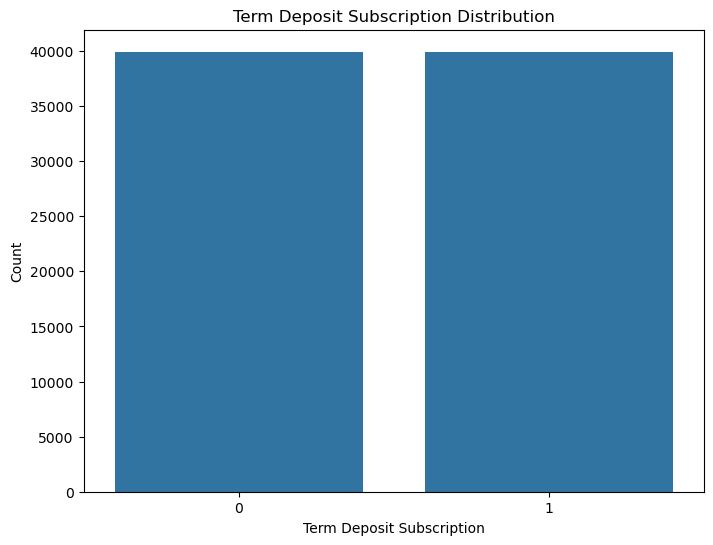

In [503]:
plt.figure(figsize=(8, 6))
sns.countplot(x="term_deposit_subscription",data=bank_df_resampled)
plt.title('Term Deposit Subscription Distribution')
plt.xlabel('Term Deposit Subscription')
plt.ylabel('Count')
plt.show()

In [504]:
bank_df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79844 entries, 0 to 79843
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   customer_age                  79844 non-null  int64 
 1   job_type                      79844 non-null  object
 2   marital_status                79844 non-null  object
 3   education_level               79844 non-null  object
 4   has_default_credit            79844 non-null  object
 5   account_balance               79844 non-null  int64 
 6   has_housing_loan              79844 non-null  object
 7   has_personal_loan             79844 non-null  object
 8   contact_type                  79844 non-null  object
 9   last_contact_day              79844 non-null  int64 
 10  last_contact_month            79844 non-null  object
 11  contact_duration              79844 non-null  int64 
 12  num_contacts_during_campaign  79844 non-null  int64 
 13  days_since_prev_

In [505]:
bank_df_resampled.shape

(79844, 17)

In [506]:
bank_df_resampled['term_deposit_subscription'].value_counts()

term_deposit_subscription
0    39922
1    39922
Name: count, dtype: int64

# <font color="#686868" size="5"> 🔍 Data Exploration(EDA) </font>

Exploratory Data Analysis (EDA), is an essential step in the machine learning pipeline. It involves **examining** and **visualizing the characteristics of a dataset to gain insights**, **understand patterns**, **detect anomalies**, and **prepare the data for further analysis** and **modeling**. some common techniques used in data exploration:
- Data Visualization
- Data Cleaning
- Data Preprocessing

# <font color="#4863A0" size="5"> Data Visualization

Creating visual representations such as **histograms**,**scatter plots**, **box plots**, and **heatmaps** to explore the distribution, relationships, and trends within the dataset. Visualization aids in identifying **patterns**, **correlations**, and **potential insights** that may not be apparent from just looking at the raw data. there are some ways to discover it:
- Graphical Analysis
    - Bar Charts
    - Pie Charts 
    - Histograms
- Correlation Analysis
- Data Relationships Analysis

In [509]:
#Creating function for numerical analysis
def plot_hist(column):
  plt.figure(figsize=(7,4))
  sns.histplot(data=bank_df_resampled,x=column,kde=True)
  plt.show()

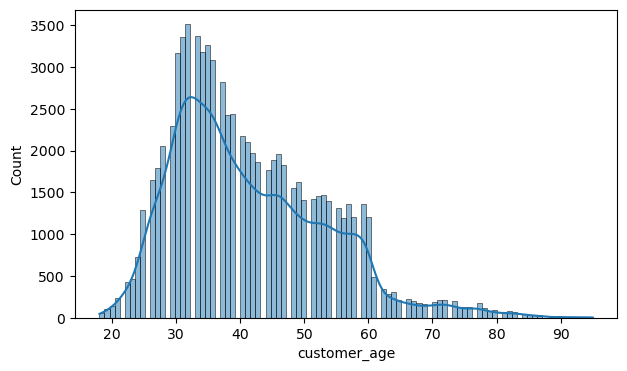

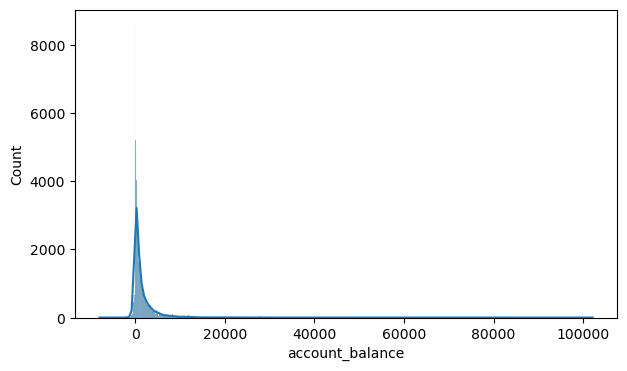

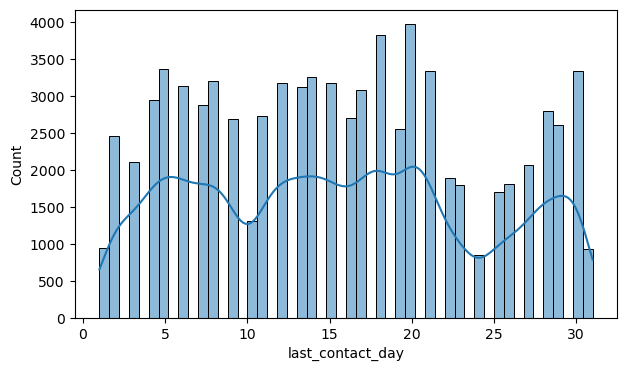

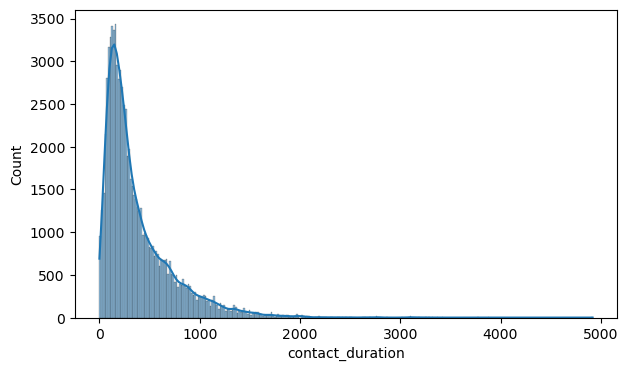

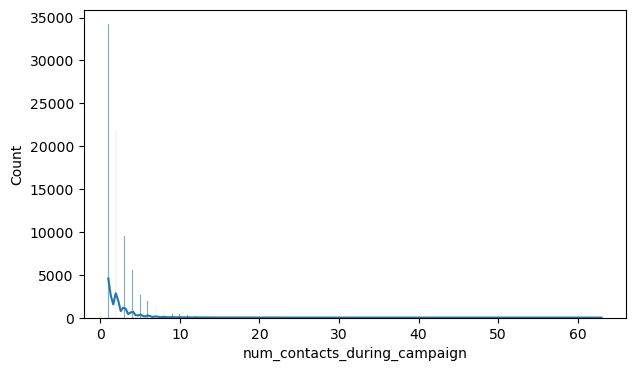

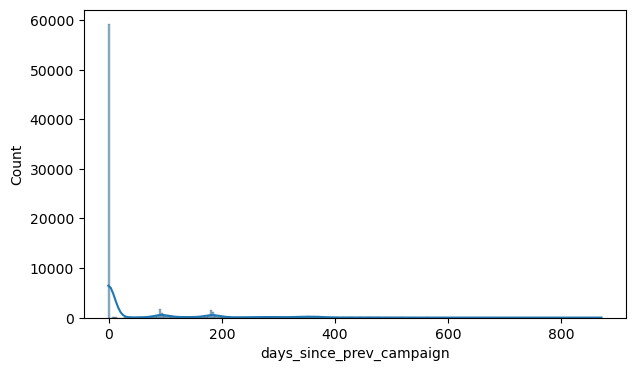

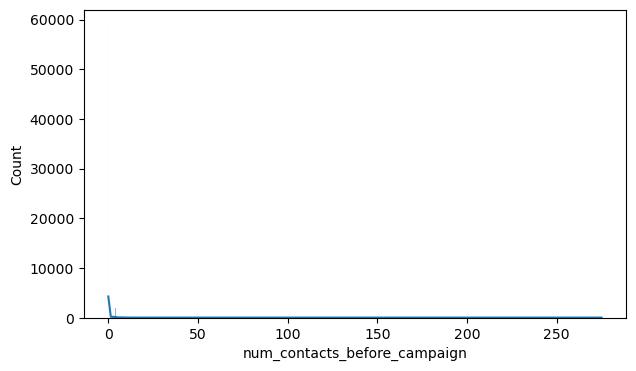

In [510]:
#plotting histogram for each numerical columns
numeric_columns = bank_df_resampled.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_columns:
    plot_hist(col)


**Take-away:**
there are 7 numerical features.

In [512]:
#categorical features
categorical_features = bank_df_resampled.select_dtypes(include='object').columns
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(bank_df_resampled[feature].unique())))

The feature is job_type and number of categories are 12
The feature is marital_status and number of categories are 3
The feature is education_level and number of categories are 4
The feature is has_default_credit and number of categories are 2
The feature is has_housing_loan and number of categories are 2
The feature is has_personal_loan and number of categories are 2
The feature is contact_type and number of categories are 3
The feature is last_contact_month and number of categories are 12
The feature is prev_campaign_outcome and number of categories are 4


**Take-away:**


There are 9 categorical features
feasure job and month has highest number of categorical valess.

### Categorical Feature Distribution ###

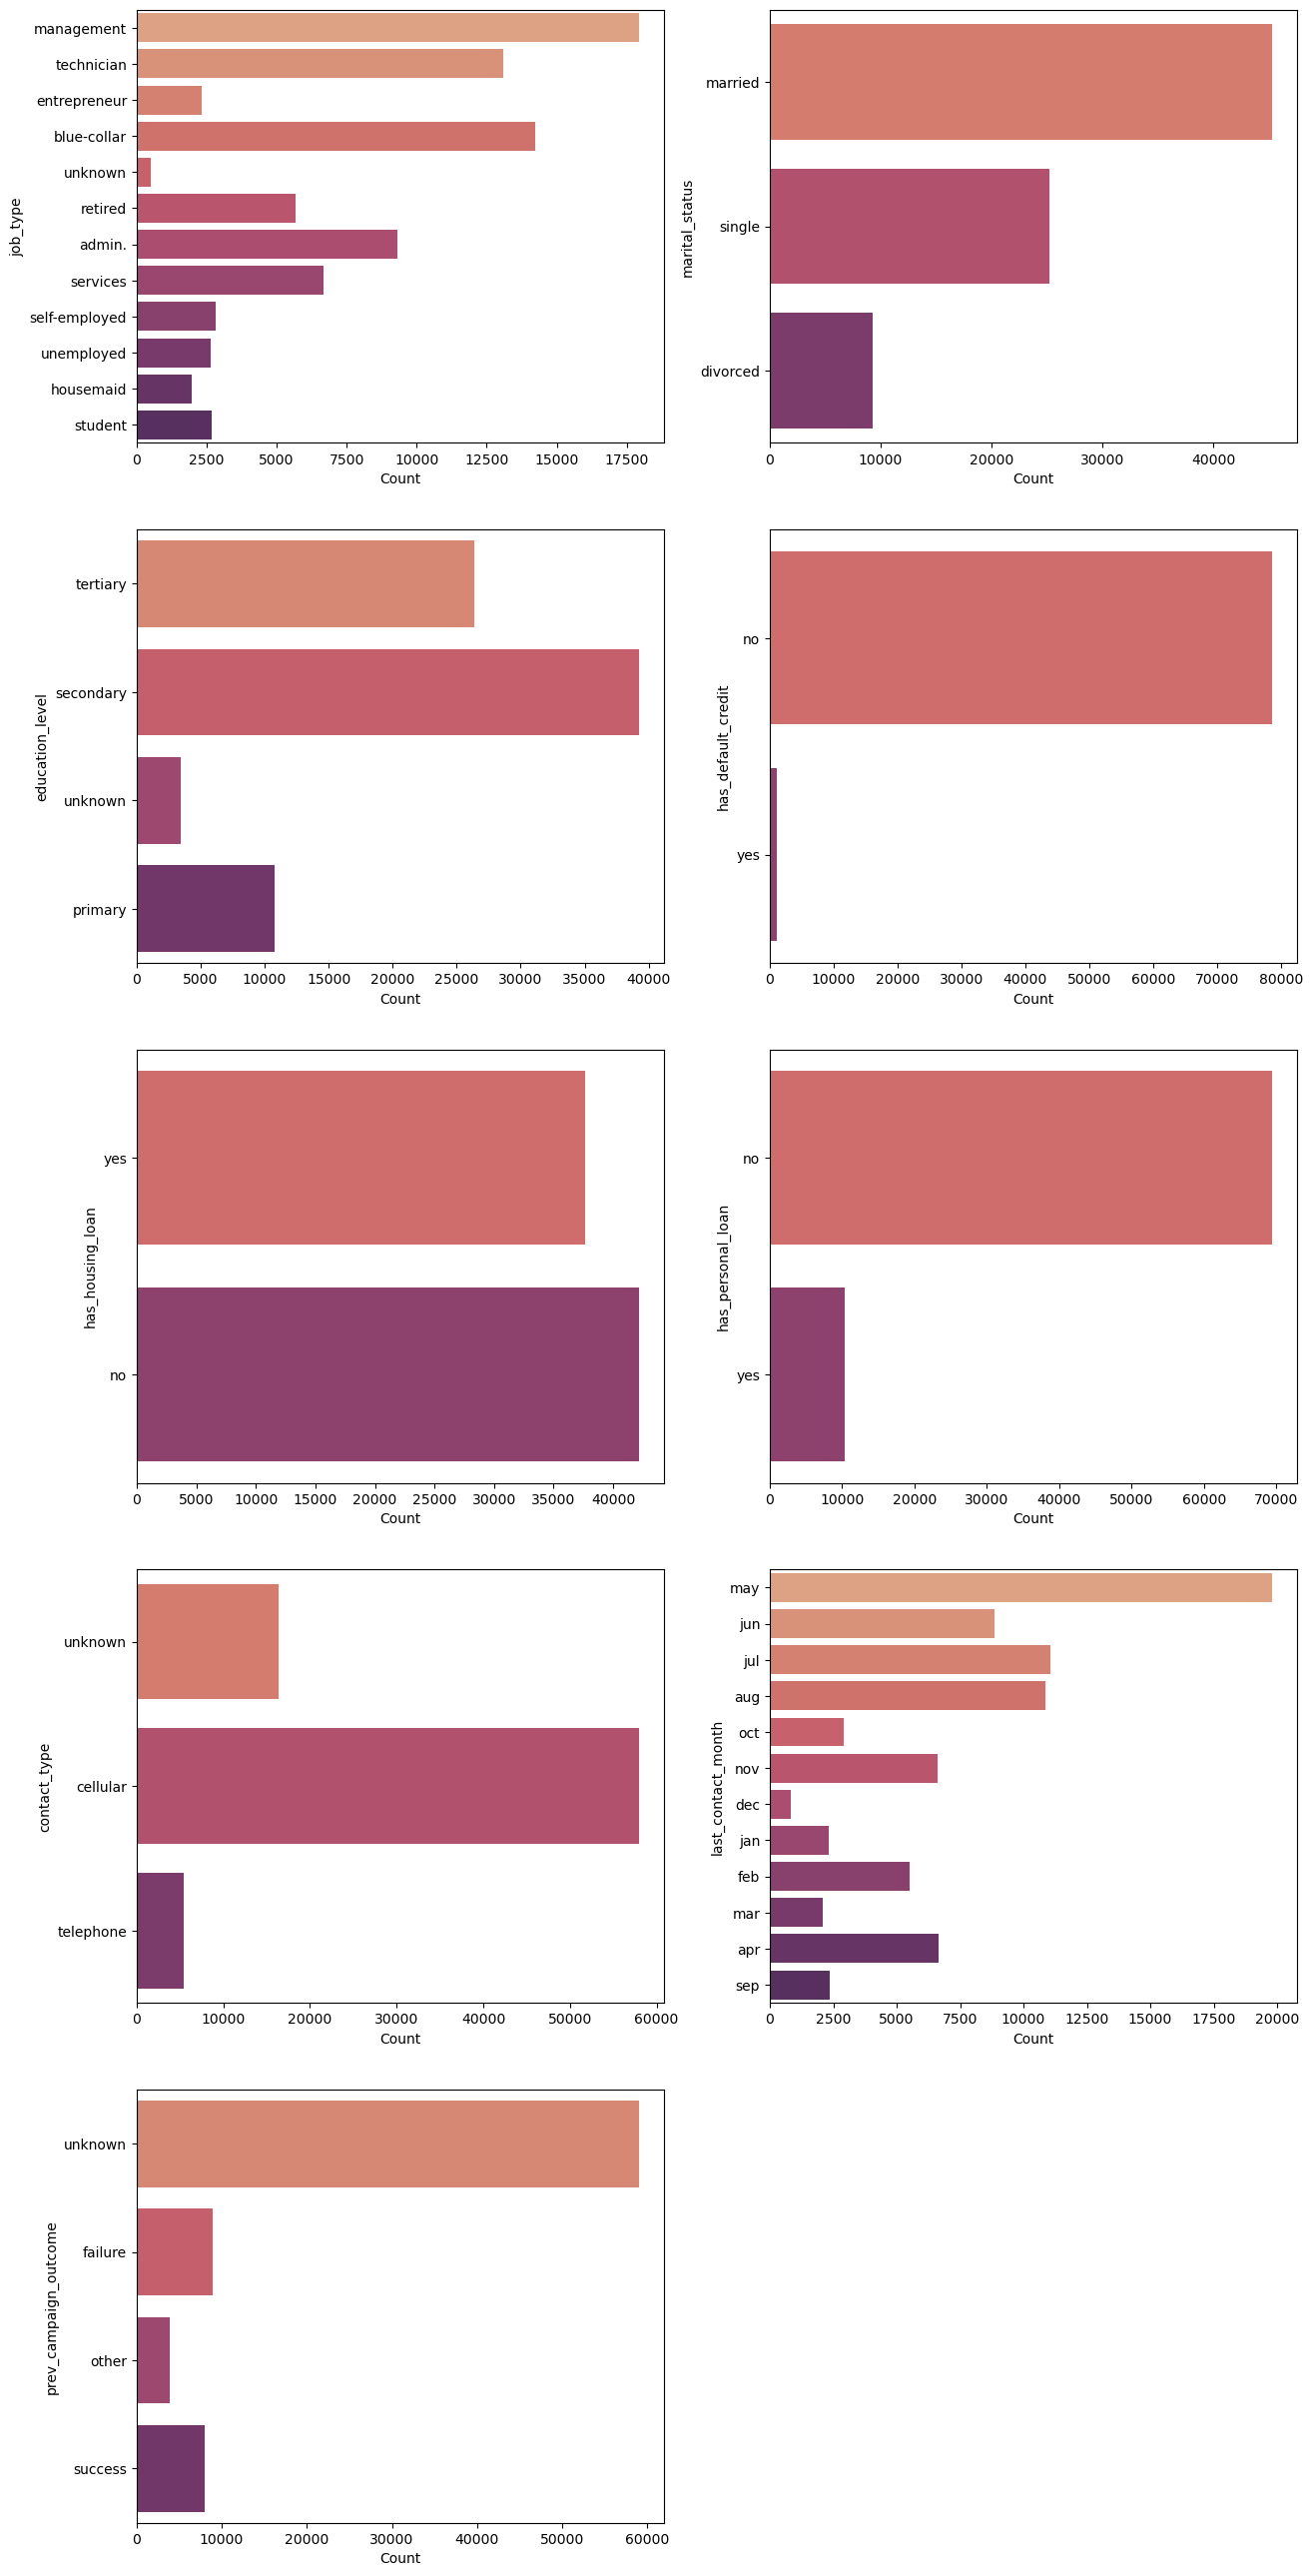

In [515]:
#check count based on categorical features
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,2,plotnumber)
    sns.countplot(y=categorical_feature,data=bank_df_resampled,palette="flare")
    plt.xlabel('Count')
    plt.ylabel(categorical_feature)
    plotnumber+=1
plt.show()

**Take-away:**

- client with **job type** as management records are high in given dataset and housemaid are very less
- client who **married** are high in records in given dataset and divorced are less
- client whoes **education background** is secondary are in high numbers in given dataset
- **has_default_credit** feature has value of no at high ratio to value yes

In [517]:
#Check target label split over categorical features and find the count
for categorical_feature in categorical_features:
    print(bank_df_resampled.groupby(['term_deposit_subscription',categorical_feature]).size())

term_deposit_subscription  job_type     
0                          admin.           4540
                           blue-collar      9024
                           entrepreneur     1364
                           housemaid        1131
                           management       8157
                           retired          1748
                           self-employed    1392
                           services         3785
                           student           669
                           technician       6757
                           unemployed       1101
                           unknown           254
1                          admin.           4755
                           blue-collar      5208
                           entrepreneur      965
                           housemaid         816
                           management       9789
                           retired          3927
                           self-employed    1420
                           s

### Relationship between Categorical Features and Label

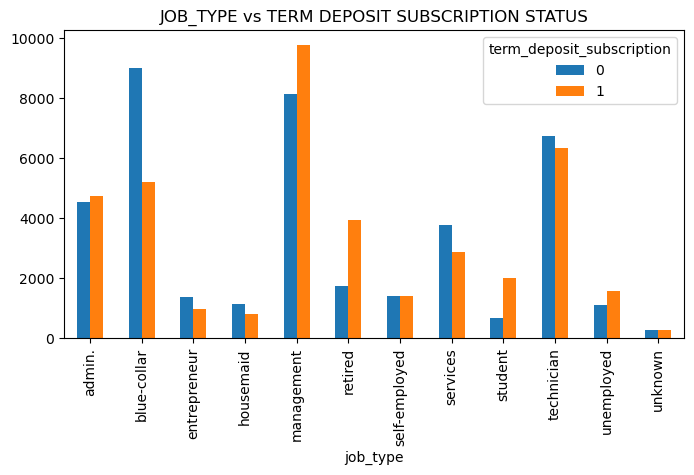

In [519]:

pd.crosstab(bank_df_resampled.job_type,bank_df_resampled.term_deposit_subscription).plot(kind='bar',figsize=(8,4))

plt.title('JOB_TYPE vs TERM DEPOSIT SUBSCRIPTION STATUS')
plt.show()

Around 20% of managers were subscribed term deposit.

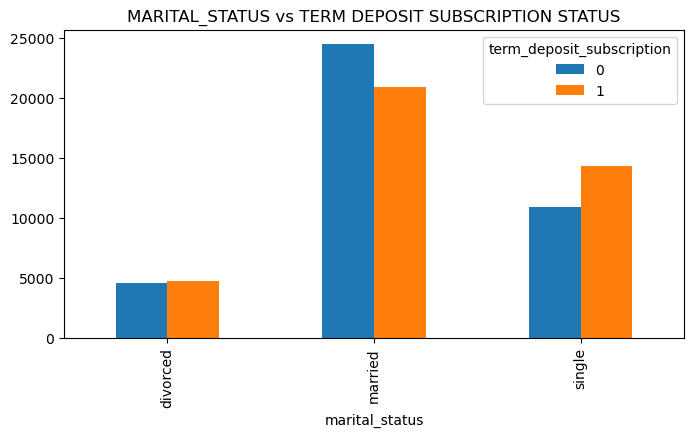

In [521]:

pd.crosstab(bank_df_resampled.marital_status,bank_df_resampled.term_deposit_subscription).plot(kind='bar',figsize=(8,4))

plt.title('MARITAL_STATUS vs TERM DEPOSIT SUBSCRIPTION STATUS')
plt.show()

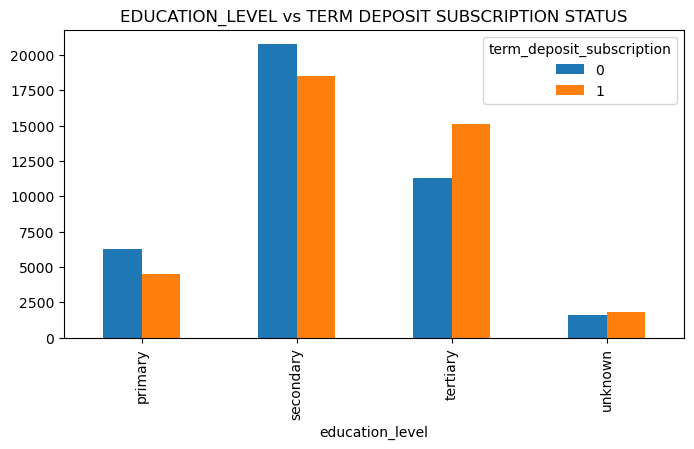

In [522]:

pd.crosstab(bank_df_resampled.education_level,bank_df_resampled.term_deposit_subscription).plot(kind='bar',figsize=(8,4))

plt.title('EDUCATION_LEVEL vs TERM DEPOSIT SUBSCRIPTION STATUS')
plt.show()

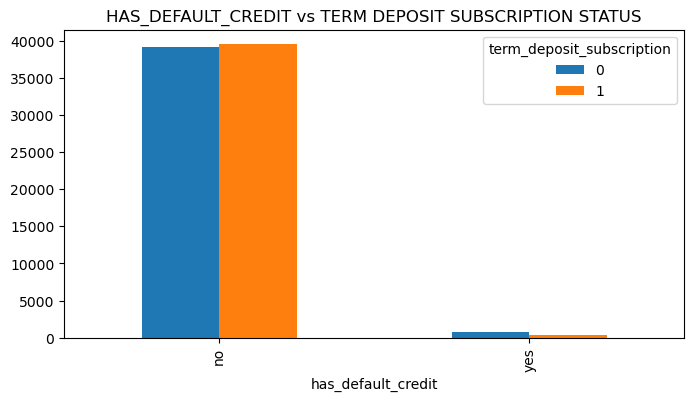

In [523]:

pd.crosstab(bank_df_resampled.has_default_credit,bank_df_resampled.term_deposit_subscription).plot(kind='bar',figsize=(8,4))

plt.title('HAS_DEFAULT_CREDIT vs TERM DEPOSIT SUBSCRIPTION STATUS')
plt.show()

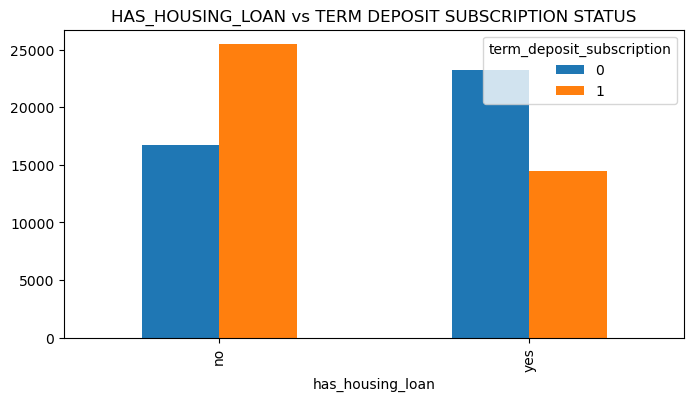

In [524]:

pd.crosstab(bank_df_resampled.has_housing_loan,bank_df_resampled.term_deposit_subscription).plot(kind='bar',figsize=(8,4))

plt.title('HAS_HOUSING_LOAN vs TERM DEPOSIT SUBSCRIPTION STATUS')
plt.show()

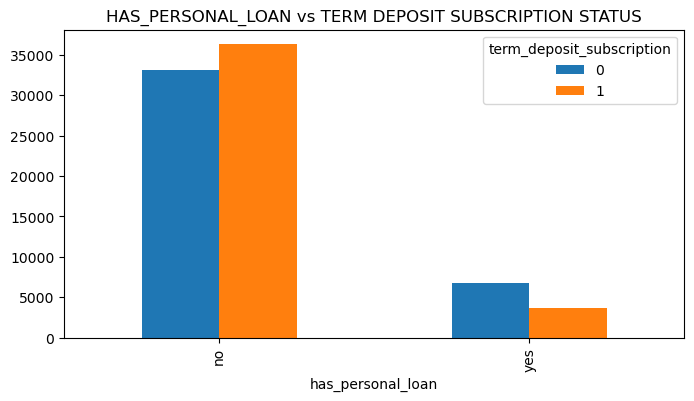

In [525]:

pd.crosstab(bank_df_resampled.has_personal_loan,bank_df_resampled.term_deposit_subscription).plot(kind='bar',figsize=(8,4))

plt.title('HAS_PERSONAL_LOAN vs TERM DEPOSIT SUBSCRIPTION STATUS')
plt.show()

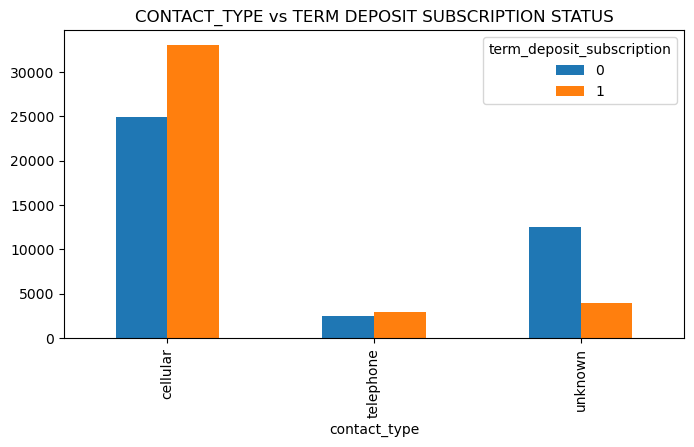

In [526]:

pd.crosstab(bank_df_resampled.contact_type,bank_df_resampled.term_deposit_subscription).plot(kind='bar',figsize=(8,4))

plt.title('CONTACT_TYPE vs TERM DEPOSIT SUBSCRIPTION STATUS')
plt.show()

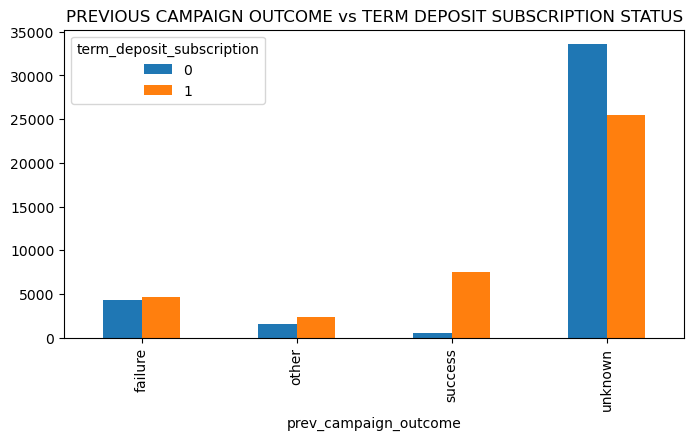

In [527]:
pd.crosstab(bank_df_resampled.prev_campaign_outcome,bank_df_resampled.term_deposit_subscription).plot(kind='bar',figsize=(8,4))

plt.title('PREVIOUS CAMPAIGN OUTCOME vs TERM DEPOSIT SUBSCRIPTION STATUS')
plt.show()

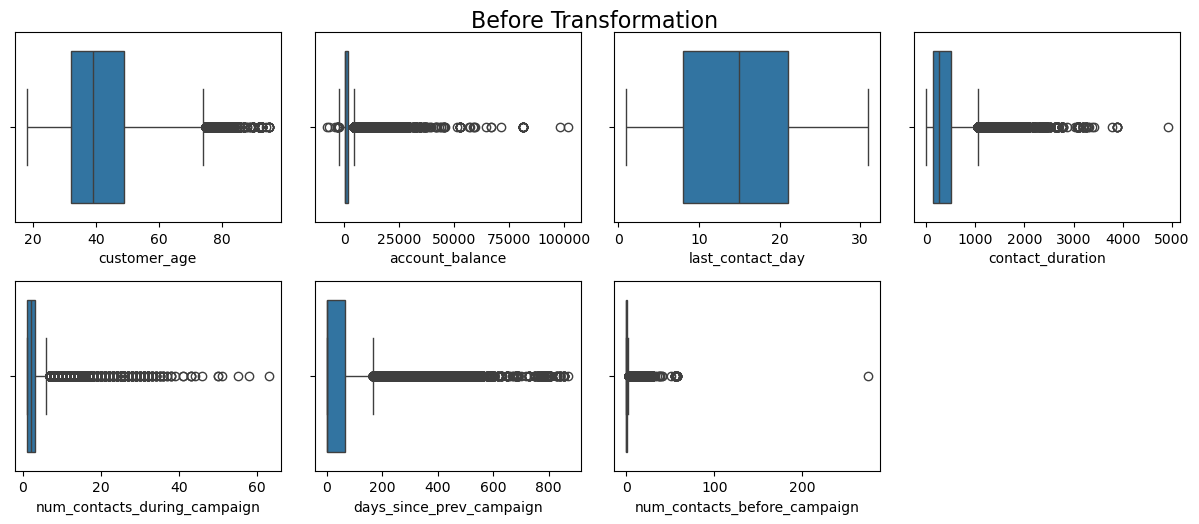

In [528]:
# check distribution and outliers
plt.figure(figsize=(12,15))
plt.suptitle("Before Transformation", fontsize = 16)
index = 1
for col in numeric_columns:
    plt.subplot(6,4,index)
    sns.boxplot(x=bank_df_resampled[col])
    index+=1
plt.tight_layout()
plt.show()


In [529]:
#Checking Skewness
skewness = bank_df_resampled[numeric_columns].skew()
print("Skewness:\n", skewness)

Skewness:
 customer_age                     0.831272
account_balance                  8.022053
last_contact_day                 0.126157
contact_duration                 2.121283
num_contacts_during_campaign     5.201246
days_since_prev_campaign         2.373541
num_contacts_before_campaign    23.104818
dtype: float64


**Skewness**
- customer_age                     0.831272    Slightly right-skewed.   Action: No action needed
- account_balance                  8.022053    Highly right-skewed. Action:Log transformation needed
- last_contact_day                 0.126157    Almost symmetric.   Action:No action needed
- contact_duration                 2.121283    Strongly right-skewed.  Action:Log or square root transformation needed
- num_contacts_during_campaign     5.201246    Highly right-skewed.  Action:Log transformation needed
- days_since_prev_campaign         2.373541    Strongly right-skewed.  Action:Log transformation needed
- num_contacts_before_campaign    23.104818    Extremely right-skewed.  Action:Log transformation or capping needed


In [583]:
#create a copy of the resampled dataset
bank_df_resampled_skew=bank_df_resampled.copy()

In [585]:

# transform skewed features
bank_df_resampled_skew['account_balance'] = np.sqrt(bank_df_resampled_skew['account_balance'])
bank_df_resampled_skew['contact_duration'] = np.sqrt(bank_df_resampled_skew['contact_duration'])
bank_df_resampled_skew['num_contacts_during_campaign'] = np.log1p(bank_df_resampled_skew['num_contacts_during_campaign'])
bank_df_resampled_skew['days_since_prev_campaign'] = np.sqrt(bank_df_resampled_skew['days_since_prev_campaign'] )
bank_df_resampled_skew['num_contacts_before_campaign'] = np.log1p(bank_df_resampled_skew['num_contacts_before_campaign'])

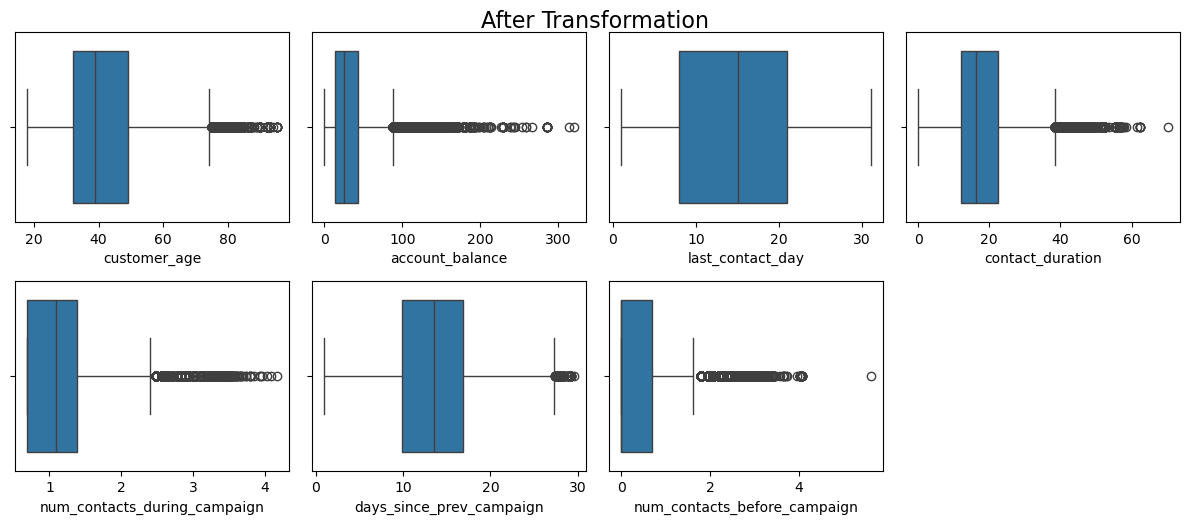

In [587]:
# check distribution and outliers after skewness treatment
plt.figure(figsize=(12,15))
plt.suptitle("After Transformation", fontsize = 16)
index = 1
for col in numeric_columns:
    plt.subplot(6,4,index)
    sns.boxplot(x=bank_df_resampled_skew[col])
    index+=1
plt.tight_layout()
plt.show()

In [589]:
#Checking Skewness
skewness = bank_df_resampled_skew[numeric_columns].skew()
print("Skewness:\n", skewness)

Skewness:
 customer_age                    0.831272
account_balance                 1.784634
last_contact_day                0.126157
contact_duration                0.846242
num_contacts_during_campaign    1.387098
days_since_prev_campaign        0.254020
num_contacts_before_campaign    1.861768
dtype: float64


In [595]:
#Checking kurtosis
kurtosis = bank_df_resampled_skew[numeric_columns].kurtosis()
print("kurtosis:\n", kurtosis)#Checking kurtosis


kurtosis:
 customer_age                    0.533221
account_balance                 6.268601
last_contact_day               -1.059731
contact_duration                0.707557
num_contacts_during_campaign    2.315801
days_since_prev_campaign        0.307715
num_contacts_before_campaign    2.819164
dtype: float64


## Outlier Treatment

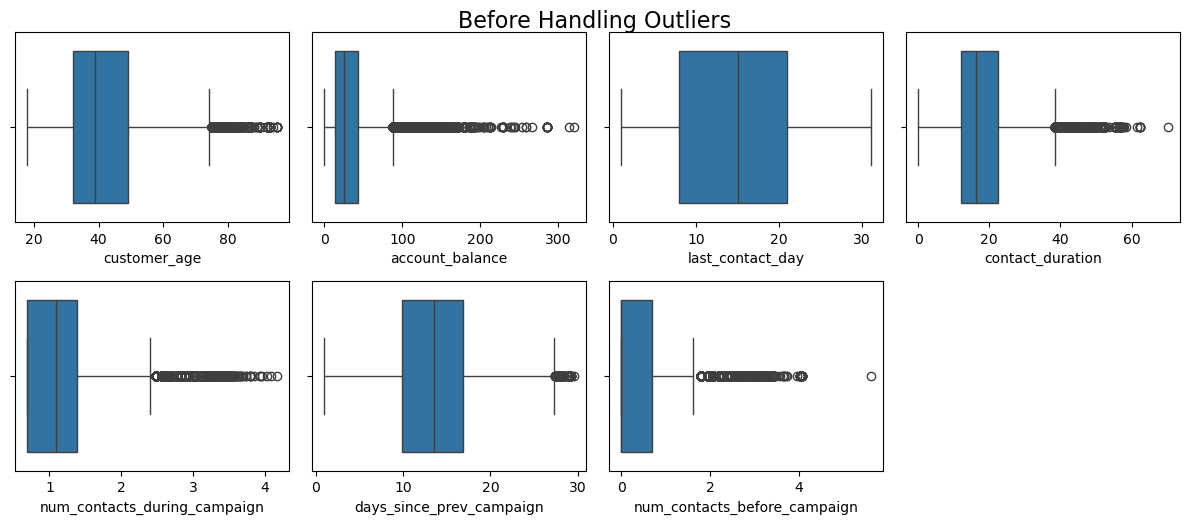

In [598]:
# check outliers
plt.figure(figsize=(12,15))
plt.suptitle("Before Handling Outliers", fontsize = 16)
index = 1
for col in numeric_columns:
    plt.subplot(6,4,index)
    sns.boxplot(x=bank_df_resampled_skew[col])
    index+=1
plt.tight_layout()
plt.show()

#### Cap outliers with IQR method and make a new df 'bank_df_resampled_skew_IQR'

In [600]:
bank_df_resampled_skew_IQR = bank_df_resampled_skew.copy() # make a df copy to make outlier capped df with IQR method
for col in ['customer_age','account_balance','contact_duration','num_contacts_during_campaign', 'days_since_prev_campaign','num_contacts_before_campaign']:
    Q1 = bank_df_resampled_skew_IQR[col].quantile(0.25)
    Q3 = bank_df_resampled_skew_IQR[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    bank_df_resampled_skew_IQR[col] = np.where(bank_df_resampled_skew_IQR[col] < lower_bound, lower_bound, np.where(bank_df_resampled_skew_IQR[col] > upper_bound, upper_bound, bank_df_resampled_skew_IQR[col]))

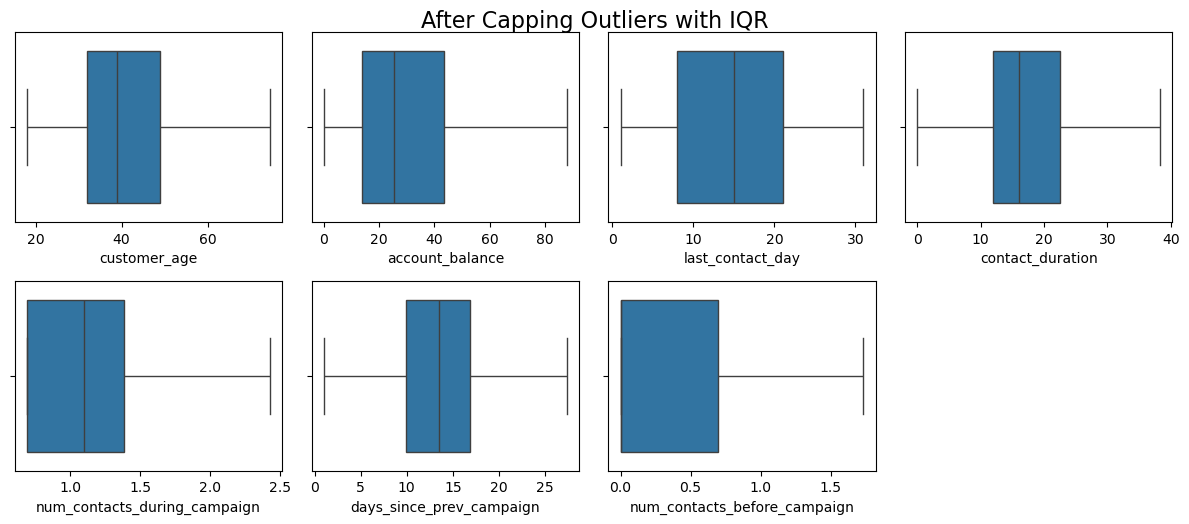

In [615]:
# check outliers after capping with IQR
plt.figure(figsize=(12,15))
plt.suptitle("After Capping Outliers with IQR", fontsize = 16)
index = 1
for col in numeric_columns:
    plt.subplot(6,4,index)
    sns.boxplot(x=bank_df_resampled_skew_IQR[col])
    index+=1
plt.tight_layout()
plt.show()

#### Cap outliers with Zscore method and make a new df 'bank_df_resampled_skew_Zscore

In [611]:
from scipy.stats import zscore

In [621]:
bank_df_resampled_skew_Zscore = bank_df_resampled_skew.copy() # make a df copy to make outlier capped df with z score methode
for col in ['customer_age','account_balance','contact_duration','num_contacts_during_campaign', 'days_since_prev_campaign','num_contacts_before_campaign']:             
    z_score = zscore(bank_df_resampled_skew_Zscore[col])         # calculate the Z-score for the column
    outlier_mask = np.abs(z_score) > 3 # make mask of outliers
    upper_bound = bank_df_resampled_skew_Zscore[col][~outlier_mask].max() # invert the mask and get the max of non outlier value
    lower_bound = bank_df_resampled_skew_Zscore[col][~outlier_mask].min() # invert the mask and get the min of non outlier value
    bank_df_resampled_skew_Zscore[col] = np.where(z_score > 3, upper_bound, np.where(z_score < -3, lower_bound, bank_df_resampled_skew_Zscore[col])) # cap the outlier values

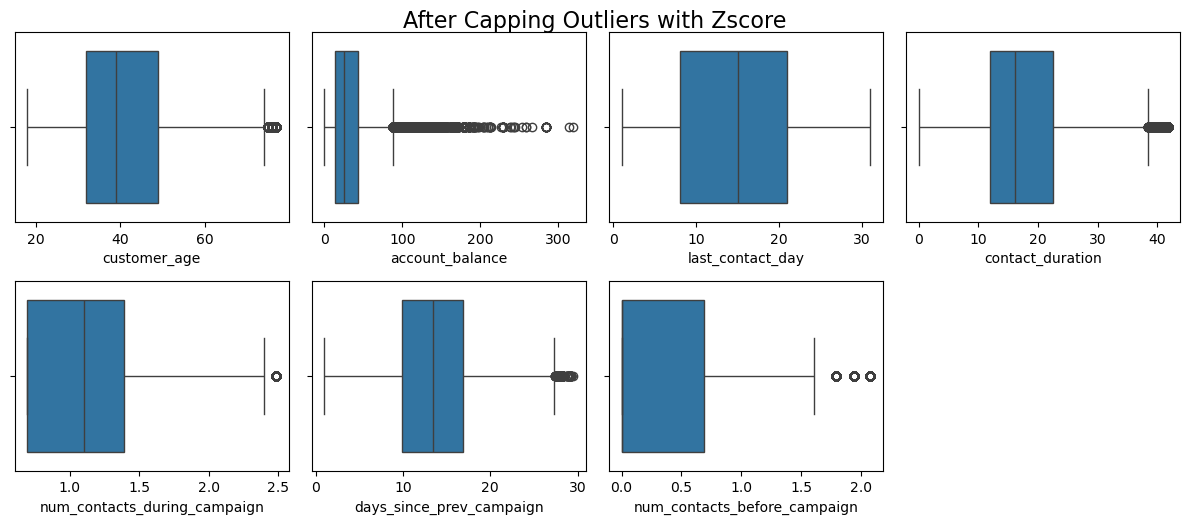

In [619]:
# check outliers after capping with Zscore
plt.figure(figsize=(12,15))
plt.suptitle("After Capping Outliers with Zscore", fontsize = 16)
index = 1
for col in numeric_columns:
    plt.subplot(6,4,index)
    sns.boxplot(x=bank_df_resampled_skew_Zscore[col])
    index+=1
plt.tight_layout()
plt.show()

<h2 style="color: Red; font-family: Arial; font-weight: bold;text-align:left">Feature Engineering</h2>

In [631]:
We have job_type', 'marital_status', 'education_level', 'has_default_credit',
       'has_housing_loan', 'has_personal_loan', 'contact_type',
       'last_contact_month', 'prev_campaign_outcome' as Object Type.So for nominal categorical variables, job_type', 'marital_status', 'education_level', 'has_default_credit',
       'has_housing_loan', 'has_personal_loan', 'contact_type', 'prev_campaign_outcome' using Onehot Encoding decided to change them using Month & VisitorsType with Ordinal Encoding and Weekend with astype function

SyntaxError: unterminated string literal (detected at line 1) (86483202.py, line 1)

categorical_features


In [ ]:
#Onehot Encoding for nominal categorical variables

### Explore the Numerical Features

In [36]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['y']))]
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  7


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


### Find Discrete Numerical Features

In [229]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


**Take-away:**
there is no Discrete Variables in give dataset

### Relation between Discrete numerical Features and Labels
- 
NA

### Find Continous Numerical Features

In [91]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['y']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 7


 ### Distribution of Continous Numerical Features

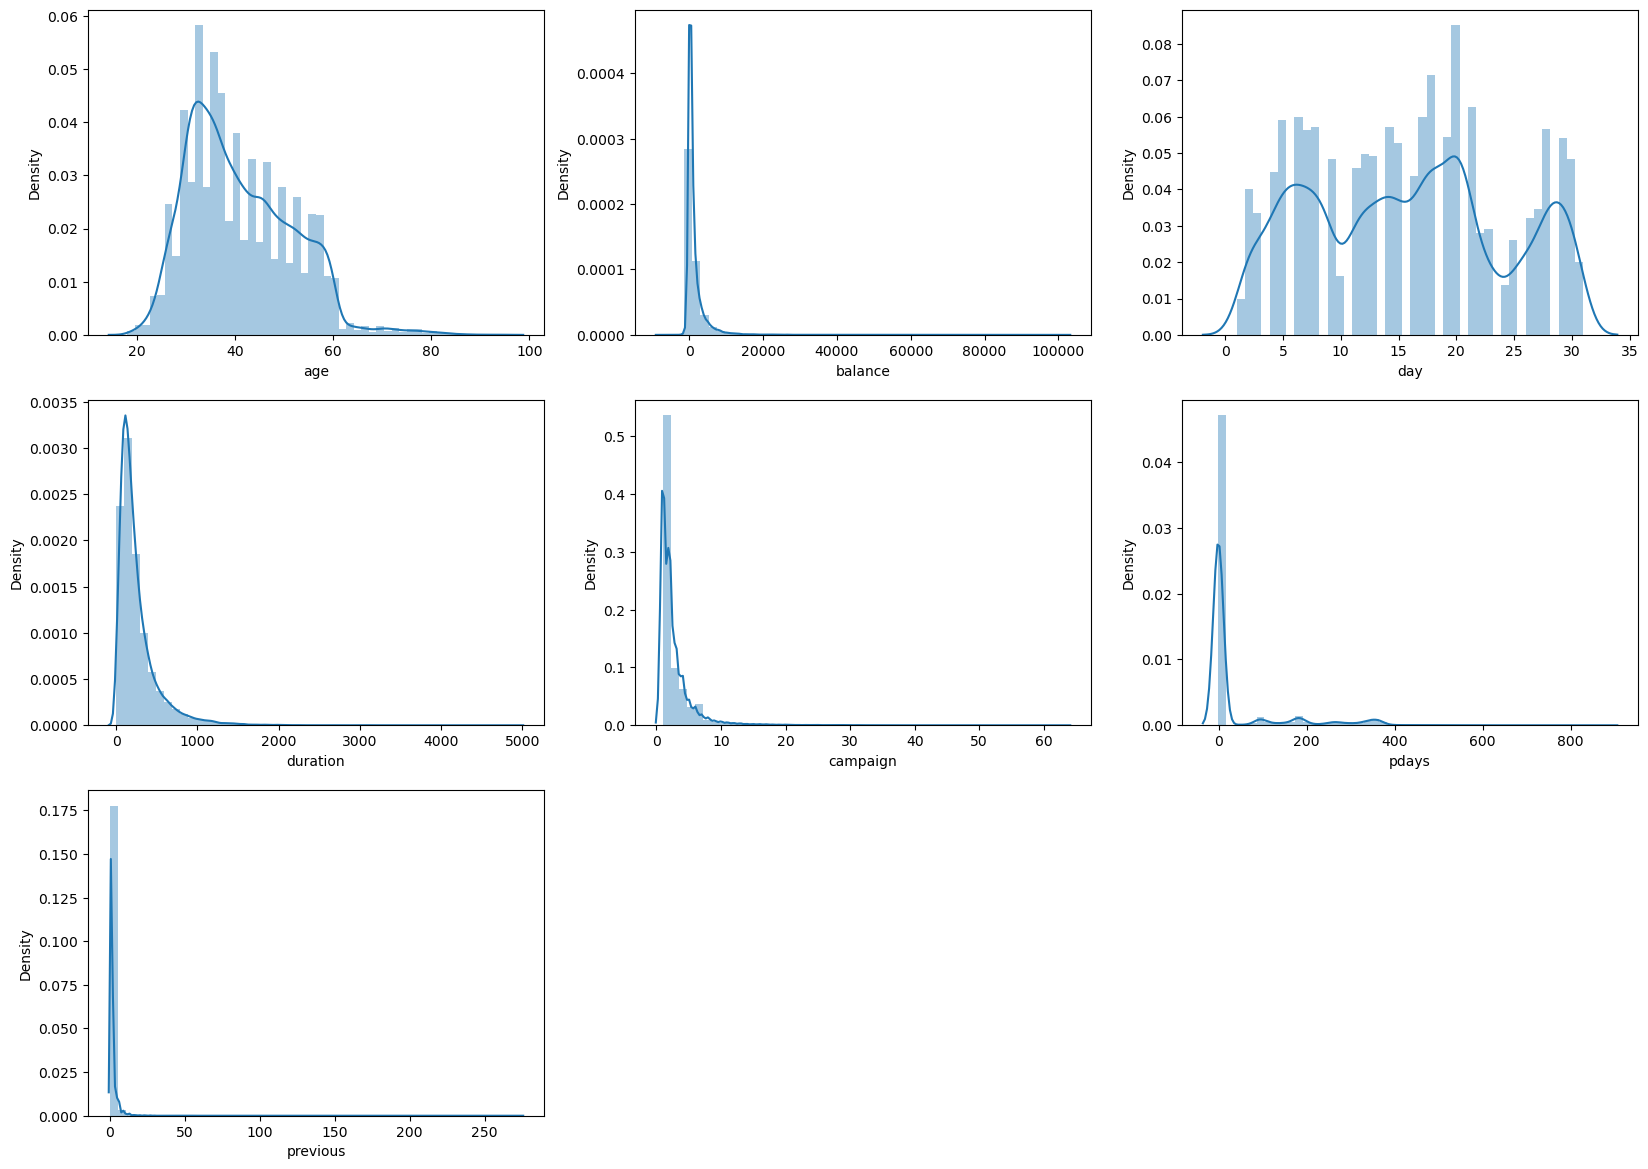

In [93]:
#plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

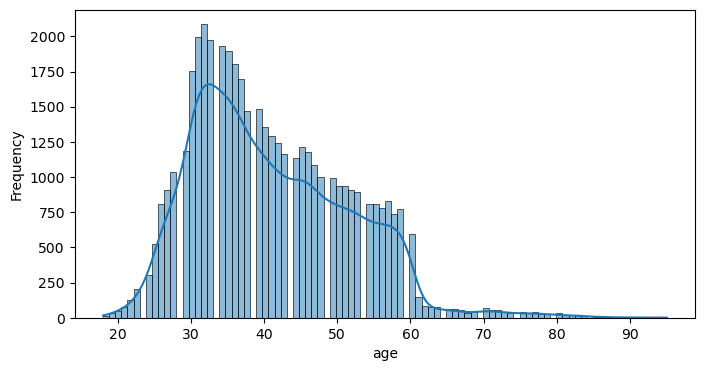

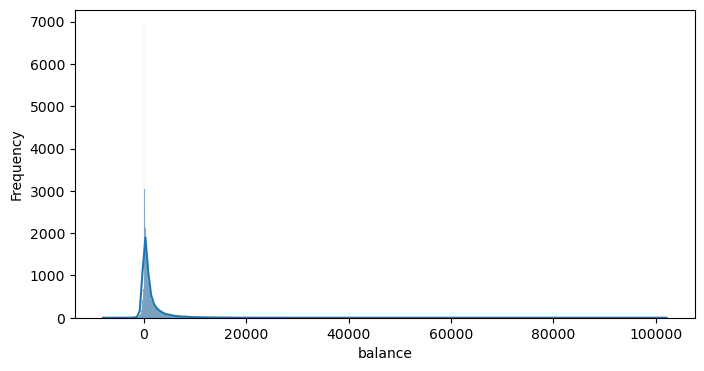

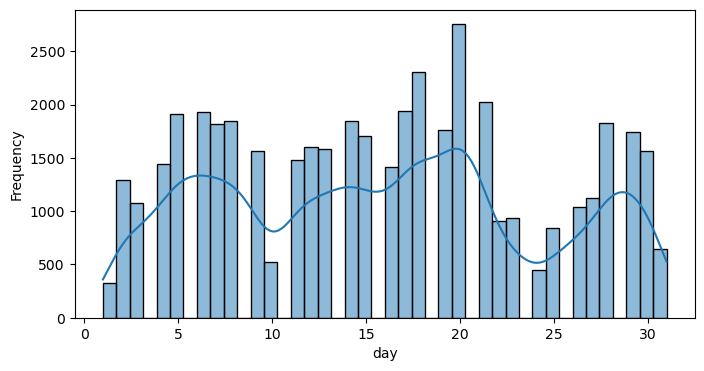

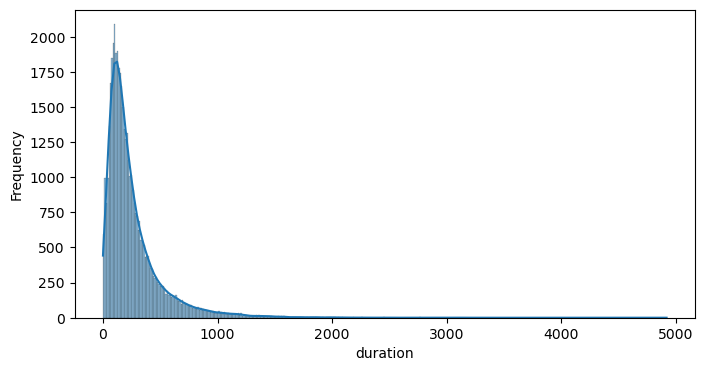

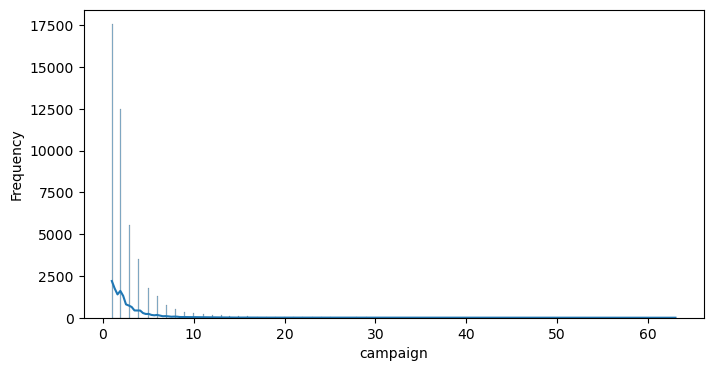

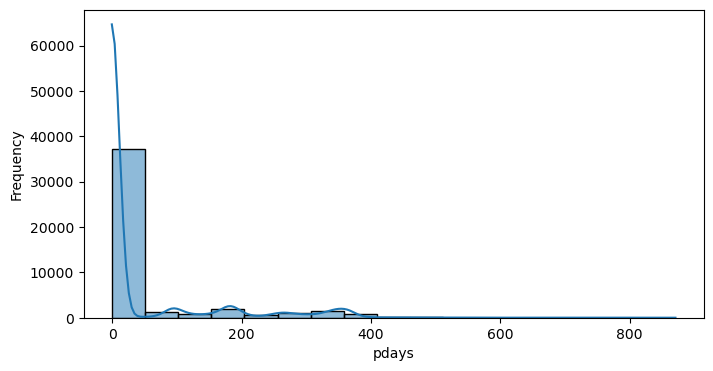

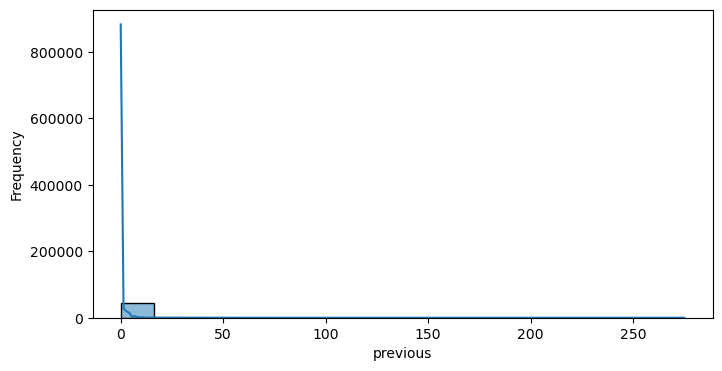

In [44]:
# Histogram distribution for numerical values "This enables us to see if there are outliers or not"

# create a function for plot distribution 
def plot_distribution(column):
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=column, kde=True)
    #plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Plot distribution for each numerical column
for feature in continuous_features:
    plot_distribution(feature)


In [117]:
# Calculate skewness for numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
skewness_values = df[numerical_columns].skew()

# Display skewness values
print("Skewness of numerical columns:")
print(skewness_values)

Skewness of numerical columns:
age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64


**Take-away:**

it seems age, days distributed normally

balance, duration, compaign, pdays and previous heavely skewed  and seems to be have some outliers.

### Relation between Continous numerical Features and Labels

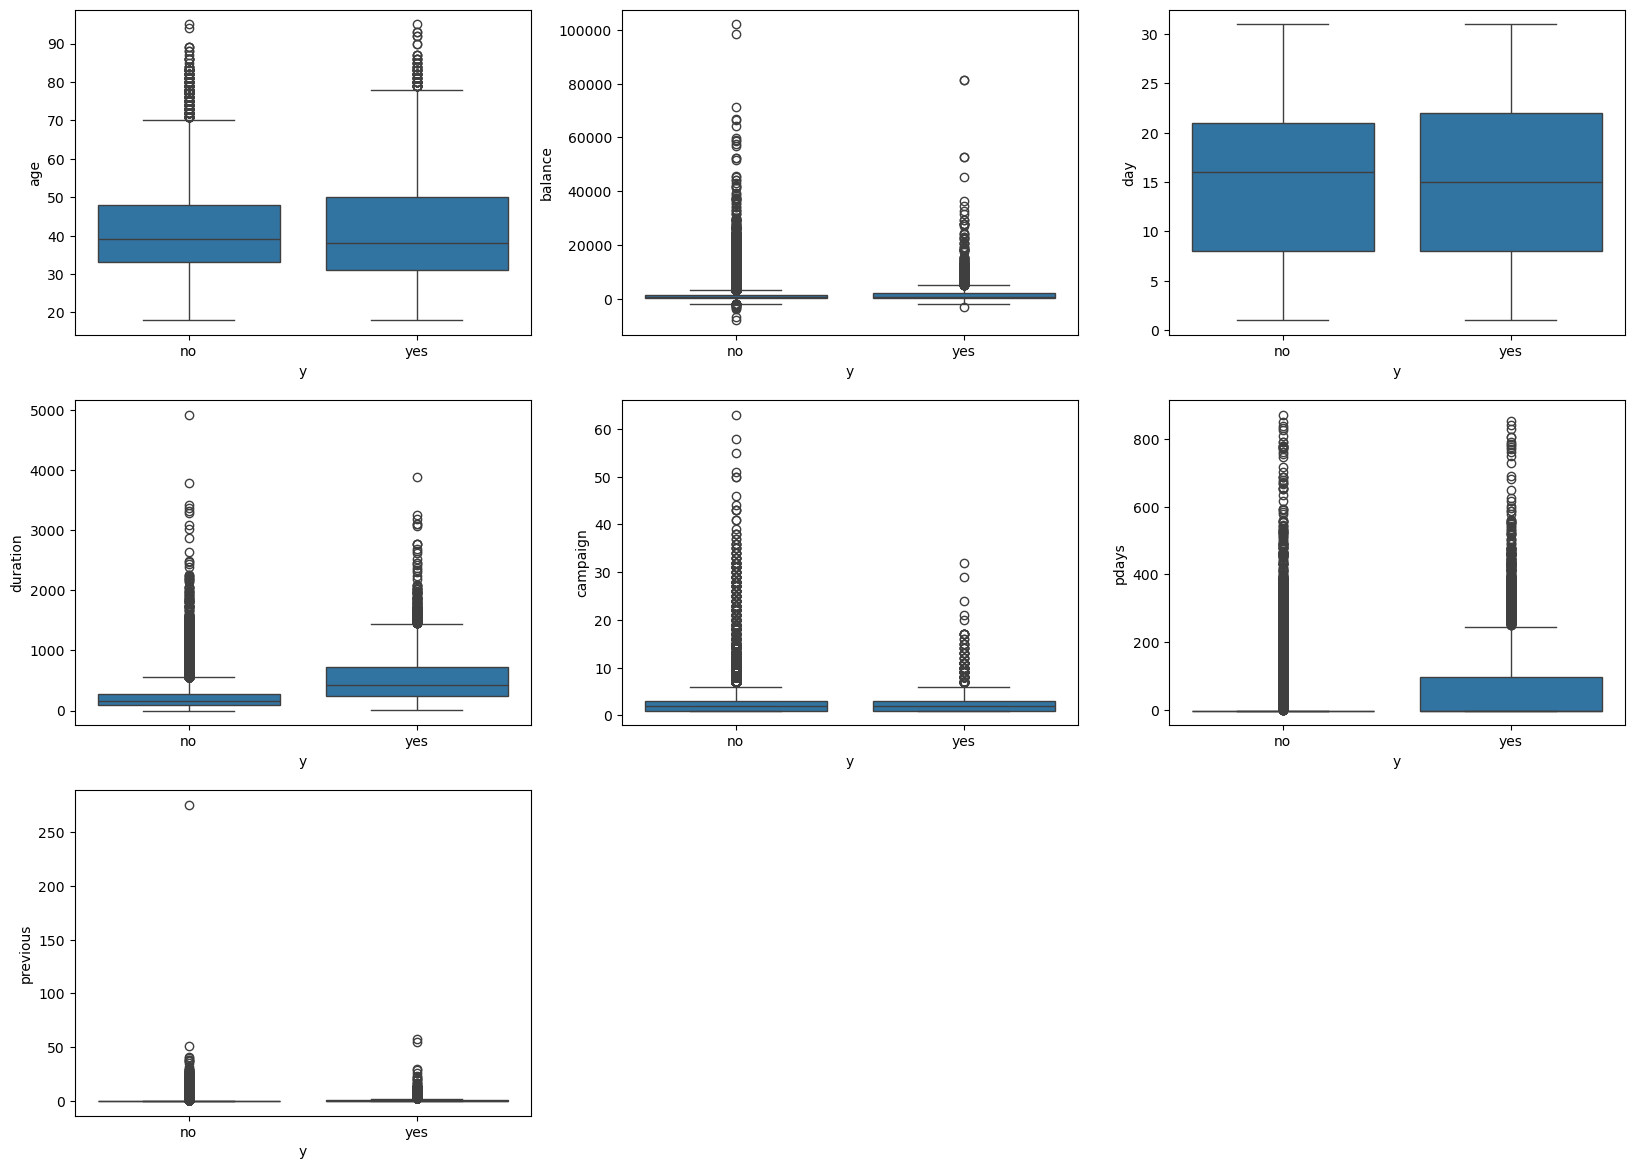

In [95]:
#boxplot to show target distribution with respect numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="y", y= df[feature], data=df)
    #plt.xlabel(feature)
    plotnumber+=1
plt.show()

**Take-away:**

client shows interest on deposit who had discussion for longer duration

In [121]:
# Calculate skewness for key numerical columns
skewness_values = df[['balance', 'duration', 'campaign','pdays']].skew()
print("Skewness before correction:\n", skewness_values)


Skewness before correction:
 balance     8.360308
duration    3.144318
campaign    4.898650
pdays       2.615715
dtype: float64


In [123]:
# Apply logarithmic transformation to correct skewness
df['log_balance'] = np.sqrt(df['balance'])  # log(1 + balance) to handle zero/negative values
df['log_duration'] = np.sqrt(df['duration'])
df['log_campaign'] = np.log1p(df['campaign'])
df['log_previous']=np.log1p(df['previous'])
# Recheck skewness after transformation
new_skewness_values = df[['log_balance', 'log_duration','log_campaign','log_previous']].skew()
print("Skewness after correction:\n", new_skewness_values)


Skewness after correction:
 log_balance     1.901328
log_duration    1.173744
log_campaign    1.326222
log_previous    2.516166
dtype: float64


In [125]:
# Calculate skewness for numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
skewness_values = df[numerical_columns].skew()

# Display skewness values
print("Skewness of numerical columns:")
print(skewness_values)

Skewness of numerical columns:
age              0.684818
balance          8.360308
day              0.093079
duration         3.144318
campaign         4.898650
pdays            2.615715
previous        41.846454
log_balance      1.901328
log_duration     1.173744
log_campaign     1.326222
log_previous     2.516166
dtype: float64


Text(0.5, 1.0, 'Log-Transformed Duration Distribution')

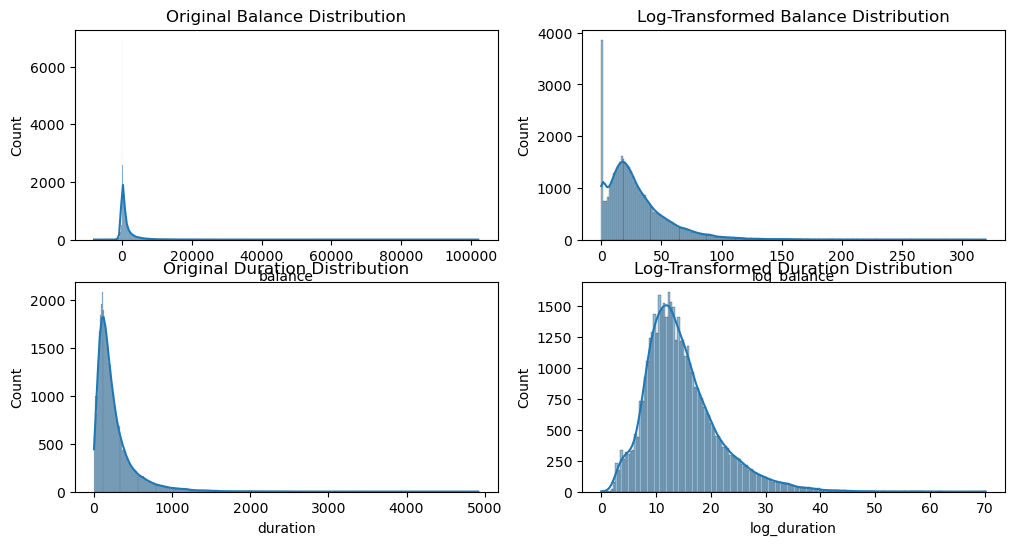

In [127]:

# Visualization to compare original and transformed data

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.histplot(df['balance'], kde=True)
plt.title('Original Balance Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df['log_balance'], kde=True)
plt.title('Log-Transformed Balance Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df['duration'], kde=True)
plt.title('Original Duration Distribution')

plt.subplot(2, 2, 4)
sns.histplot(df['log_duration'], kde=True)
plt.title('Log-Transformed Duration Distribution')


plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

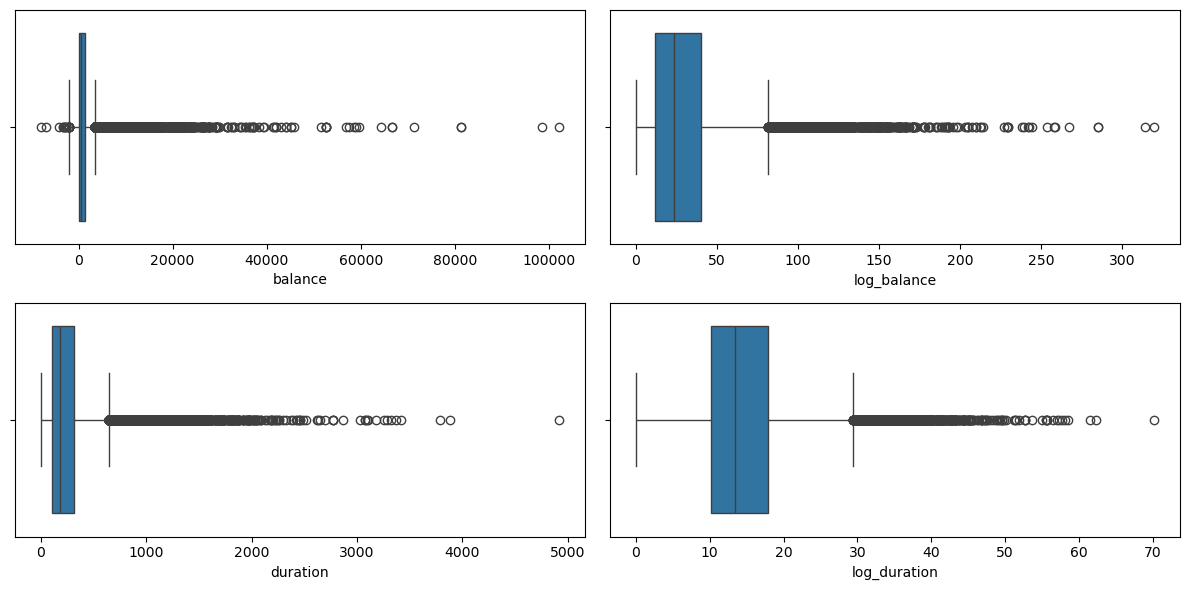

In [157]:

# Visualization to compare original and transformed data

plt.figure(figsize=(12, 6))

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.boxplot(x=df['balance'])
plt.subplot(2, 2, 2)
sns.boxplot(x=df['log_balance'])

plt.subplot(2, 2, 3)
sns.boxplot(x=df['duration'])
plt.subplot(2, 2, 4)
sns.boxplot(x=df['log_duration'])
plt.tight_layout()
plt.show()




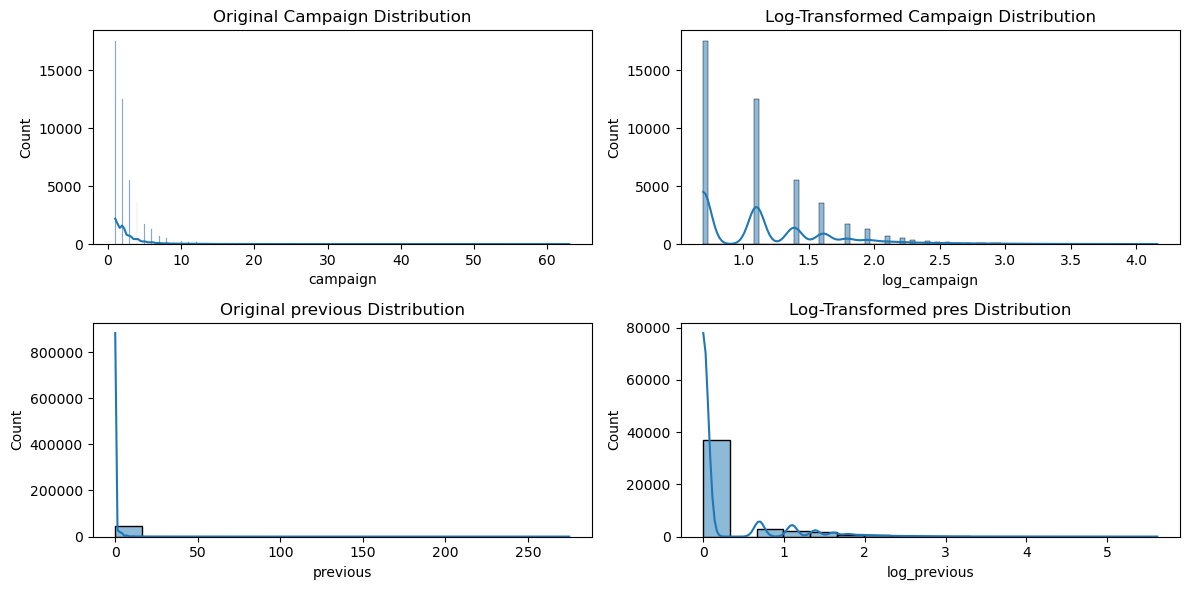

In [149]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df['campaign'], kde=True)
plt.title('Original Campaign Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df['log_campaign'], kde=True)
plt.title('Log-Transformed Campaign Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df['previous'], kde=True)
plt.title('Original previous Distribution')

plt.subplot(2, 2, 4)
sns.histplot(df['log_previous'], kde=True)
plt.title('Log-Transformed ps Distribution')
plt.tight_layout()
plt.show()

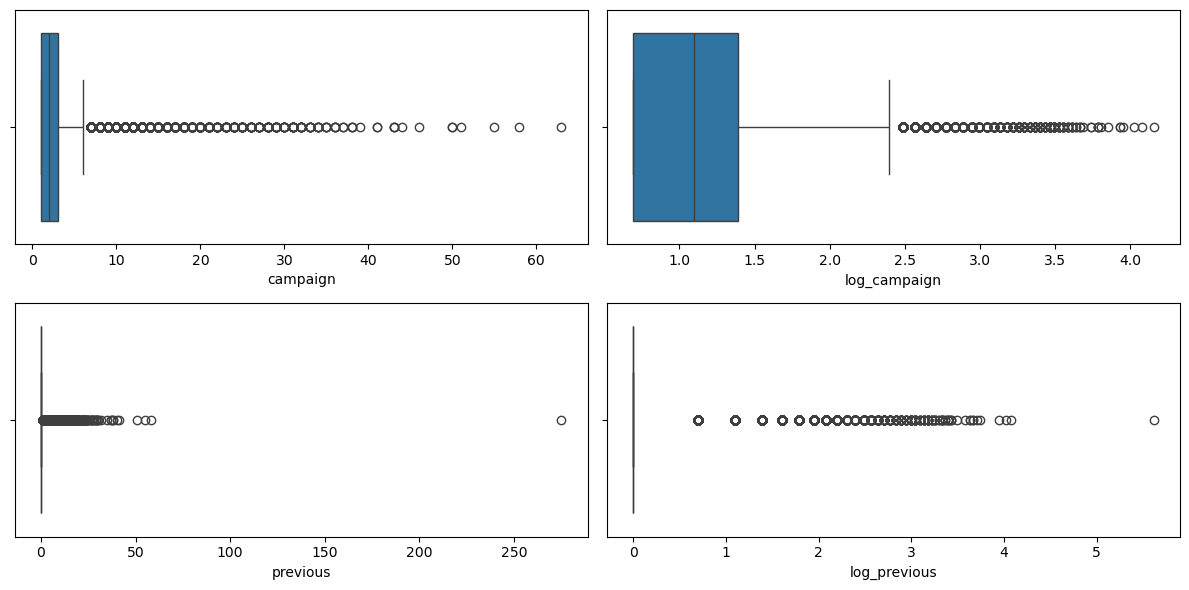

In [155]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.boxplot(x=df['campaign'])
plt.subplot(2, 2, 2)
sns.boxplot(x=df['log_campaign'])

plt.subplot(2, 2, 3)
sns.boxplot(x=df['previous'])
plt.subplot(2, 2, 4)
sns.boxplot(x=df['log_previous'])
plt.tight_layout()
plt.show()

In [159]:
df1=df
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,y,log_balance,log_duration,log_campaign,log_previous
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,261,1,-1,0,unknown,no,46.292548,16.155494,0.693147,0.0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,151,1,-1,0,unknown,no,5.385165,12.288206,0.693147,0.0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,76,1,-1,0,unknown,no,1.414214,8.717798,0.693147,0.0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,92,1,-1,0,unknown,no,38.807216,9.591663,0.693147,0.0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,198,1,-1,0,unknown,no,1.000000,14.071247,0.693147,0.0


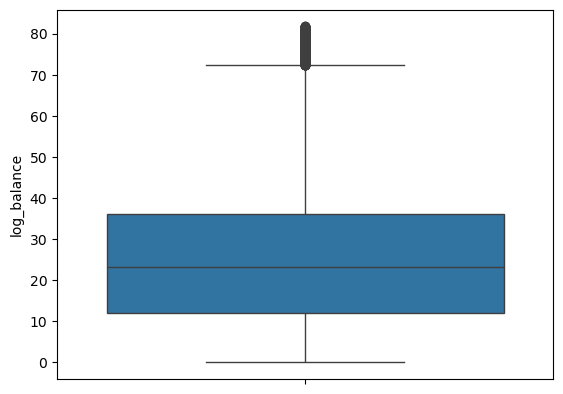

0.7363254545521004

In [163]:
q1=df1['log_balance'].quantile(0.25)
q3=df1['log_balance'].quantile(0.75)
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr
outliers= (df1['log_balance']<lower)| (df1['log_balance']>upper)
mi=df1['log_balance'].mean()
df1.loc[outliers,'log_balance']=mi

sns.boxplot(data=df1['log_balance'])
plt.show()
df1['log_balance'].skew()

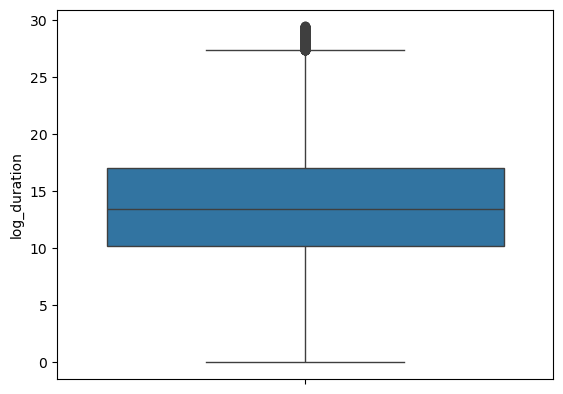

0.4955070417410832

In [165]:
q1=df1['log_duration'].quantile(0.25)
q3=df1['log_duration'].quantile(0.75)
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr
outliers= (df1['log_duration']<lower)| (df1['log_duration']>upper)
mi=df1['log_duration'].mean()
df1.loc[outliers,'log_duration']=mi

sns.boxplot(data=df1['log_duration'])
plt.show()
df1['log_duration'].skew()

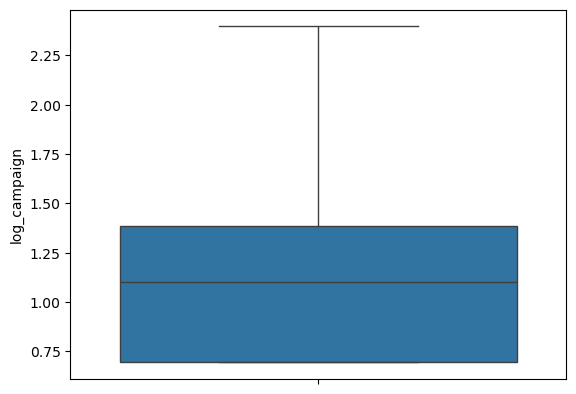

0.8346892639094128

In [167]:
q1=df1['log_campaign'].quantile(0.25)
q3=df1['log_campaign'].quantile(0.75)
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr
outliers= (df1['log_campaign']<lower)| (df1['log_campaign']>upper)
mi=df1['log_campaign'].mean()
df1.loc[outliers,'log_campaign']=mi

sns.boxplot(data=df1['log_campaign'])
plt.show()
df1['log_campaign'].skew()

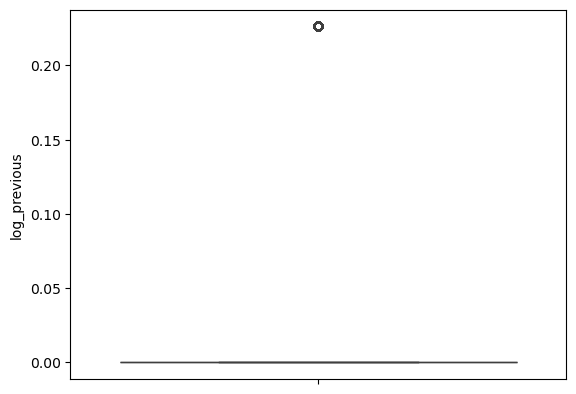

1.642892085666409

In [169]:
q1=df1['log_previous'].quantile(0.25)
q3=df1['log_previous'].quantile(0.75)
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr
outliers= (df1['log_previous']<lower)| (df1['log_previous']>upper)
mi=df1['log_previous'].mean()
df1.loc[outliers,'log_previous']=mi

sns.boxplot(data=df1['log_previous'])
plt.show()
df1['log_previous'].skew()

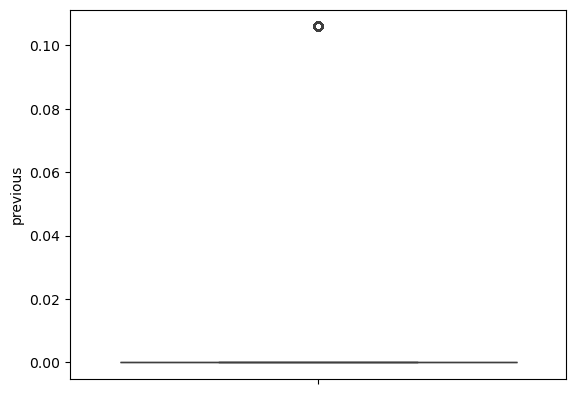

1.642892085666409

In [183]:
q1=df1['previous'].quantile(0.25)
q3=df1['previous'].quantile(0.75)
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr
outliers= (df1['previous']<lower)| (df1['log_previous']>upper)
mi=df1['previous'].mean()
df1.loc[outliers,'previous']=mi

sns.boxplot(data=df1['previous'])
plt.show()
df1['previous'].skew()

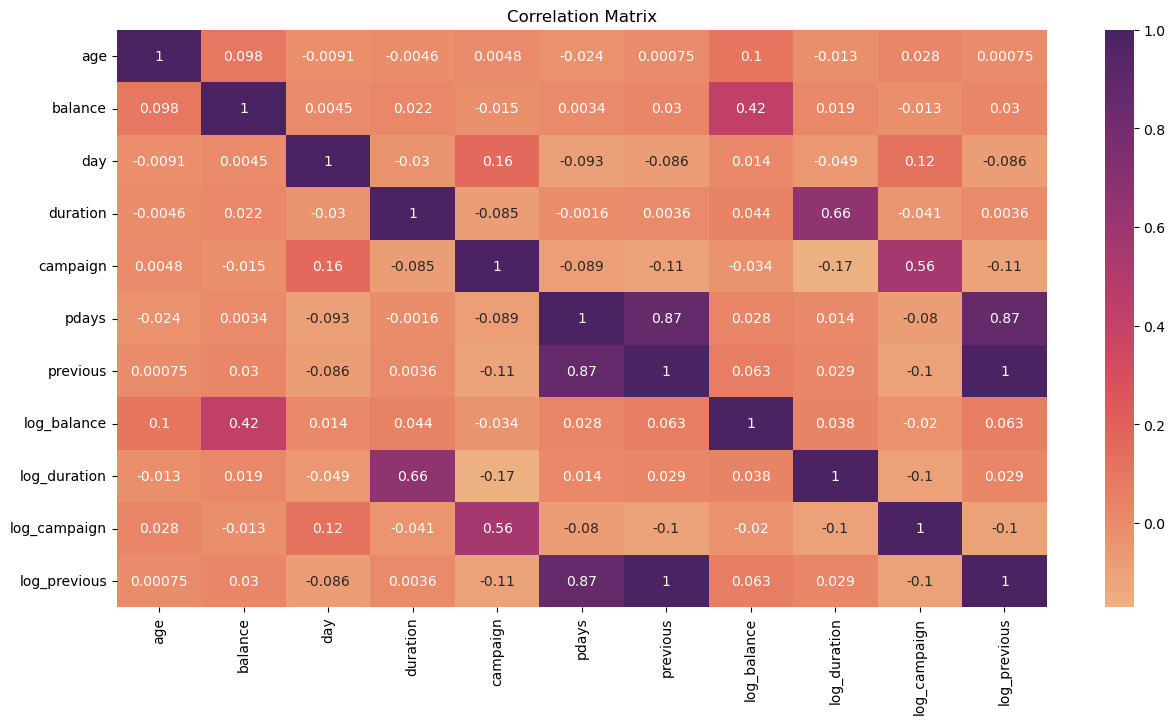

In [197]:
# Correlation matrix using heatmap
# Calculates the correlation coefficients between all pairs of numerical variables in the dataset
correlation_matrix = df1.corr(numeric_only=True)

# Create a heatmap figure with specified size (in inches)
plt.figure(figsize=(15, 7.5))

# Generate a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='flare') # annot: write the data value in each cell

# Add a title to the plot
plt.title('Correlation Matrix')

# Display the heatmap
plt.show()

In [179]:
zdf = df.copy() # make a df copy to make outlier capped df with z score methode
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:               # loop through every column in zdf
    z_score = zscore(zdf[col])         # calculate the Z-score for the column
    outlier_mask = np.abs(z_score) > 3 # make mask of outliers
    upper_bound = zdf[col][~outlier_mask].max() # invert the mask and get the max of non outlier value
    lower_bound = zdf[col][~outlier_mask].min() # invert the mask and get the min of non outlier value
    zdf[col] = np.where(z_score > 3, upper_bound, np.where(z_score < -3, lower_bound, zdf[col]))

0.5551956661132058
0.09307901402122411
2.2865466497025158
0.7363254545521004
0.4955070417410832
0.8346892639094128
1.642892085666409


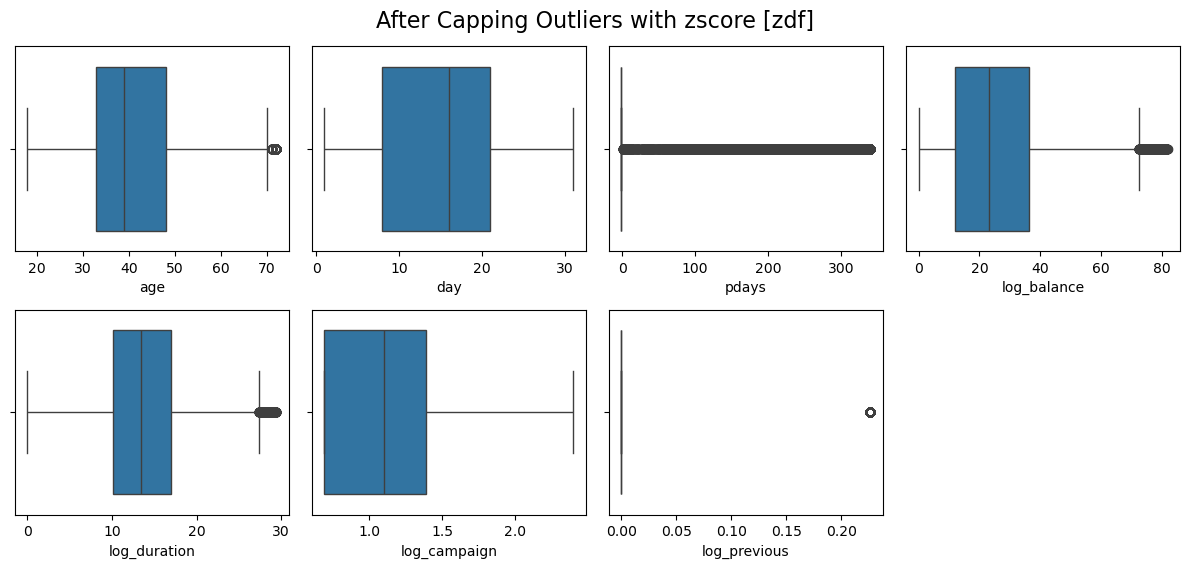

In [193]:
# check outliers after capping with z score

index = 0
plt.figure(figsize=(12,8))
plt.suptitle("After Capping Outliers with zscore [zdf]", fontsize = 16)
for col in ['age','day','pdays','log_balance','log_duration','log_campaign','log_previous']:
    index+=1
    plt.subplot(3,4,index)
    sns.boxplot(x=zdf[col])
    print(zdf[col].skew())
plt.tight_layout()
plt.show()

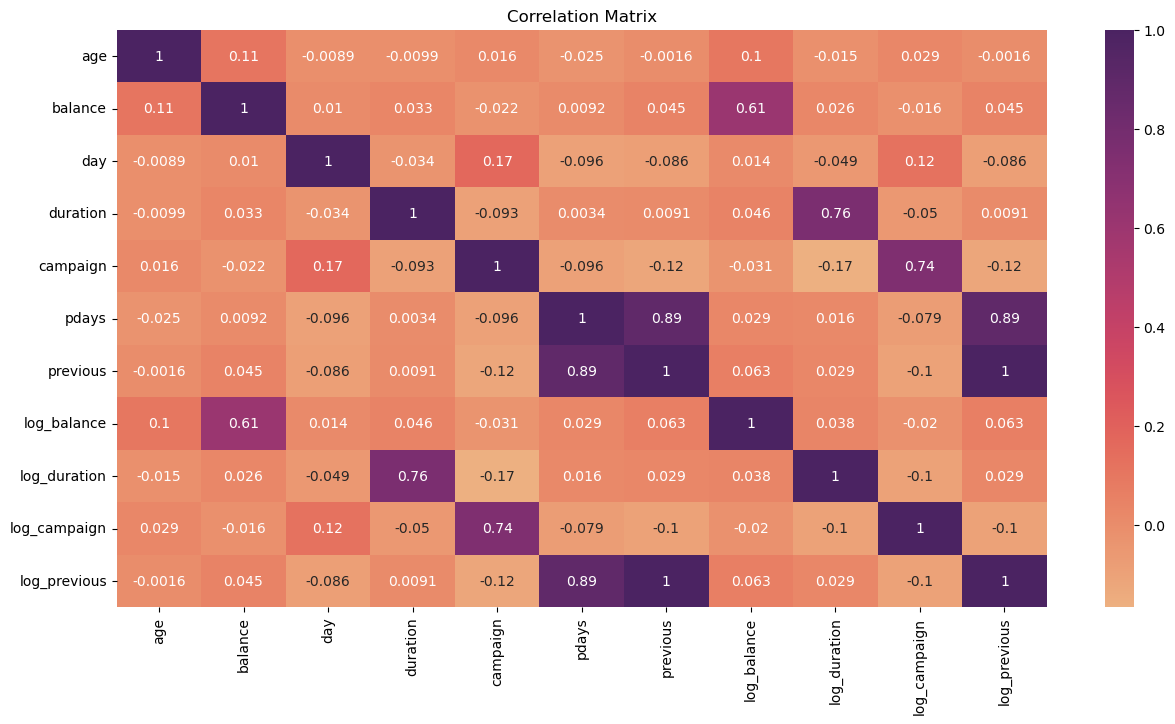

In [195]:
# Correlation matrix using heatmap
# Calculates the correlation coefficients between all pairs of numerical variables in the dataset
correlation_matrix = zdf.corr(numeric_only=True)

# Create a heatmap figure with specified size (in inches)
plt.figure(figsize=(15, 7.5))

# Generate a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='flare') # annot: write the data value in each cell

# Add a title to the plot
plt.title('Correlation Matrix')

# Display the heatmap
plt.show()

In [231]:
df["y"].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [233]:
df['y'].groupby(df['y']).count()

y
no     39922
yes     5289
Name: y, dtype: int64

In [ ]:
Key Achievements:
Developed models with XX% accuracy in predicting subscriptions.
Identified top features like duration, poutcome, and balance driving campaign success.
Recommendations:
Focus resources on high-balance clients during peak campaign months like May.
Invest in training staff for quality client interactions over quantity.
Adopt multi-channel communication strategies, prioritizing cellular over traditional phone calls.
